In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Treamyracle/AITF/refs/heads/main/%231%20Data%20Scraping/student_exam_scores.csv'
df = pd.read_csv(url)

print("--- Deskripsi Awal Dataset ---")
print(f"Jumlah entri (baris): {df.shape[0]}")
print(f"Jumlah fitur (kolom): {df.shape[1]}")

print("\n--- Informasi Tipe Data dan Nilai Non-Null ---")
df.info()

print("\n--- Statistik Deskriptif untuk Data Numerik ---")
print(df.describe())

print("\n--- Pengecekan Nilai Hilang (Missing Values) ---")
print(df.isnull().sum())

--- Deskripsi Awal Dataset ---
Jumlah entri (baris): 200
Jumlah fitur (kolom): 6

--- Informasi Tipe Data dan Nilai Non-Null ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB

--- Statistik Deskriptif untuk Data Numerik ---
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138         

In [2]:
df.isna().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Menambahkan 1 pada hours_studied untuk menghindari pembagian dengan nol
df['study_efficiency'] = df['previous_scores'] / (df['hours_studied'] + 1)

# Memilih kolom numerik yang akan di-scaling
numeric_features = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'study_efficiency']
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\n--- Lima Baris Pertama Setelah Transformasi dan Scaling ---")
print(df.head())


--- Lima Baris Pertama Setelah Transformasi dan Scaling ---
  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001       0.520154     1.458426           -0.192061        -1.395230   
1       S002      -1.561083     1.324503           -0.994074        -0.755216   
2       S003      -0.722376     1.056656           -0.079498         1.228827   
3       S004      -0.877692    -1.220042            1.426035        -0.051201   
4       S005       0.861850    -0.148655            1.053170         0.268806   

   exam_score  study_efficiency  
0        30.2         -0.924006  
1        25.0          1.706633  
2        35.8          0.772907  
3        34.0          0.420543  
4        40.3         -0.641692  


In [ ]:
def get_performance_label(score):
    if score < 40:
        return 'Gagal'
    elif 40 <= score < 60:
        return 'Cukup'
    elif 60 <= score < 80:
        return 'Baik'
    else:
        return 'Sangat Baik'

df['performance_label'] = df['exam_score'].apply(get_performance_label)

print("\n--- Hasil Pelabelan Data ---")
print(df[['exam_score', 'performance_label']].head(10))


--- Hasil Pelabelan Data ---
   exam_score performance_label
0        30.2             Gagal
1        25.0             Gagal
2        35.8             Gagal
3        34.0             Gagal
4        40.3             Cukup
5        35.7             Gagal
6        37.9             Gagal
7        18.3             Gagal
8        34.7             Gagal
9        24.7             Gagal


In [6]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,study_efficiency,performance_label
0,S001,0.520154,1.458426,-0.192061,-1.395230,30.2,-0.924006,Gagal
1,S002,-1.561083,1.324503,-0.994074,-0.755216,25.0,1.706633,Gagal
2,S003,-0.722376,1.056656,-0.079498,1.228827,35.8,0.772907,Gagal
3,S004,-0.877692,-1.220042,1.426035,-0.051201,34.0,0.420543,Gagal
4,S005,0.861850,-0.148655,1.053170,0.268806,40.3,-0.641692,Cukup


In [10]:
label_distribution = df['performance_label'].value_counts(normalize=True) * 100

print("\n--- Distribusi Label Performa Siswa (%) ---")
print(label_distribution)


--- Distribusi Label Performa Siswa (%) ---
performance_label
Gagal    81.0
Cukup    19.0
Name: proportion, dtype: float64


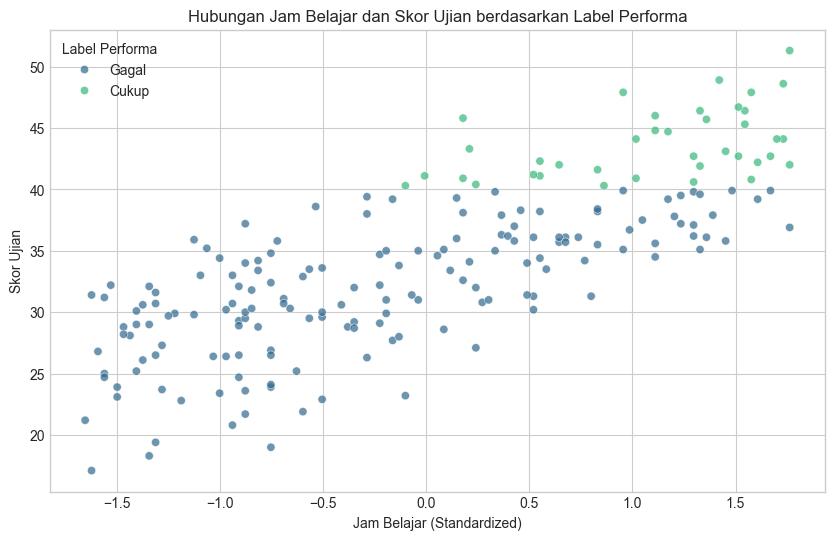

C:\Users\tream\AppData\Local\Temp\ipykernel_13684\1553536770.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='performance_label', y='previous_scores', palette='plasma',


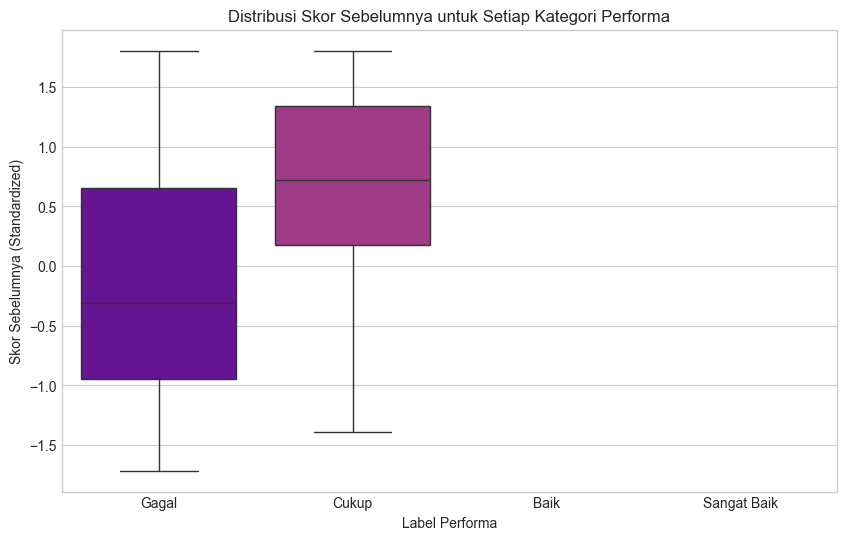

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# Hubungan Jam Belajar dengan Skor Ujian, diwarnai oleh Label Performa
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hours_studied', y='exam_score', hue='performance_label', palette='viridis', alpha=0.7)
plt.title('Hubungan Jam Belajar dan Skor Ujian berdasarkan Label Performa')
plt.xlabel('Jam Belajar (Standardized)')
plt.ylabel('Skor Ujian')
plt.legend(title='Label Performa')
plt.show()

# Distribusi Skor Sebelumnya untuk Setiap Label Performa
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='performance_label', y='previous_scores', palette='plasma', 
            order=['Gagal', 'Cukup', 'Baik', 'Sangat Baik'])
plt.title('Distribusi Skor Sebelumnya untuk Setiap Kategori Performa')
plt.xlabel('Label Performa')
plt.ylabel('Skor Sebelumnya (Standardized)')
plt.show()